In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Task 1: Exploratory Data Analysis (EDA)

In [3]:
# Load the dataset
df = pd.read_csv('mushroom.csv')
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [4]:
# Fundamental data exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [5]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698606
max,1279.000000,15.095066,25.000054


In [6]:
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [7]:
 # Check for missing values
df.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

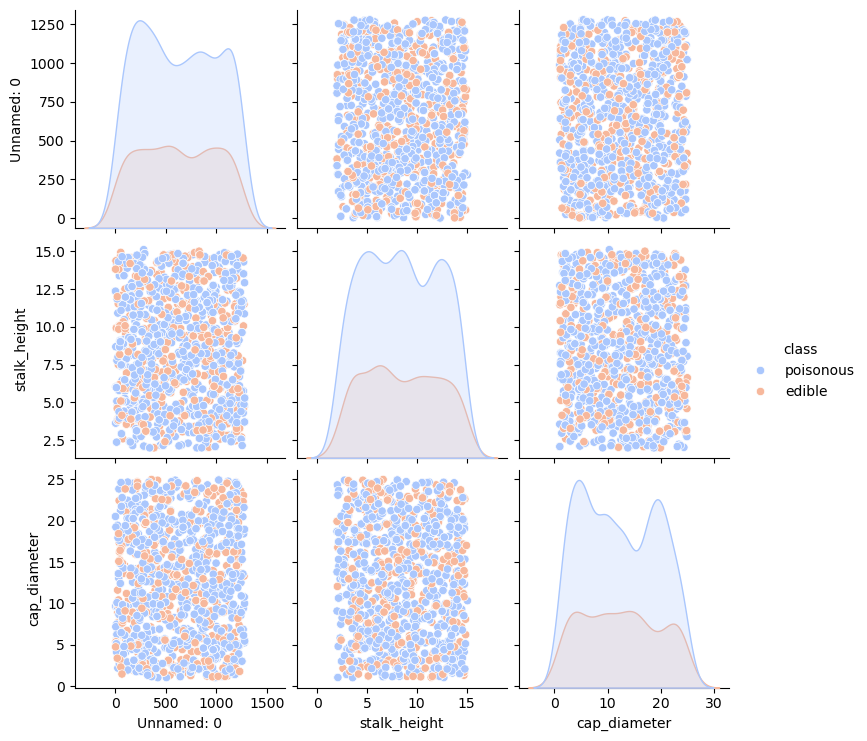

In [8]:
sns.pairplot(df, hue='class', palette='coolwarm')
plt.show()

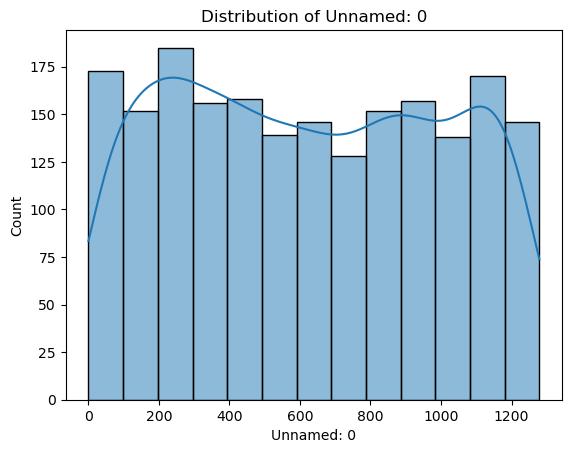

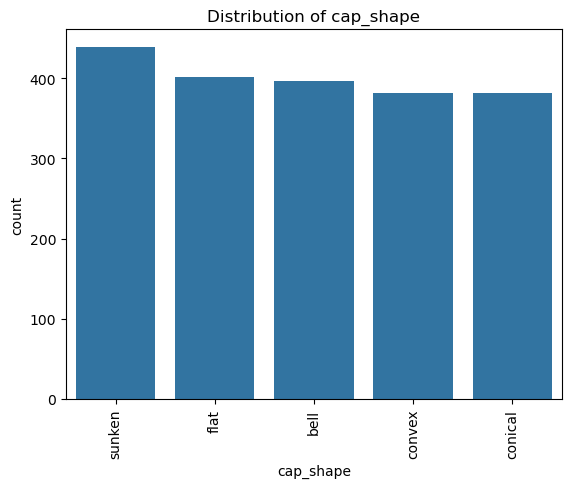

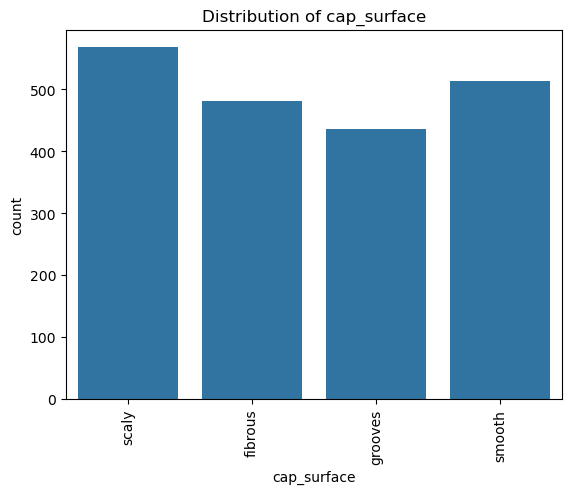

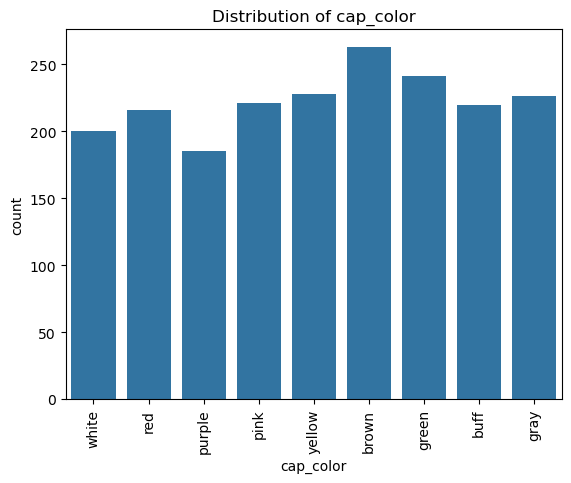

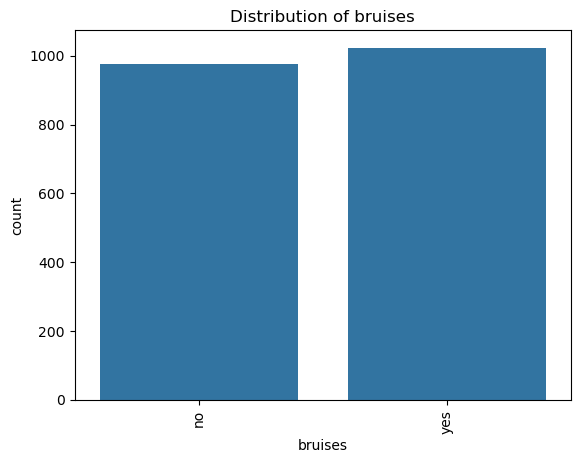

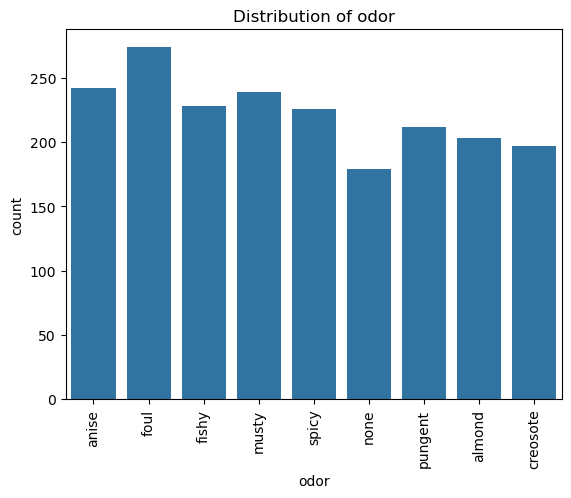

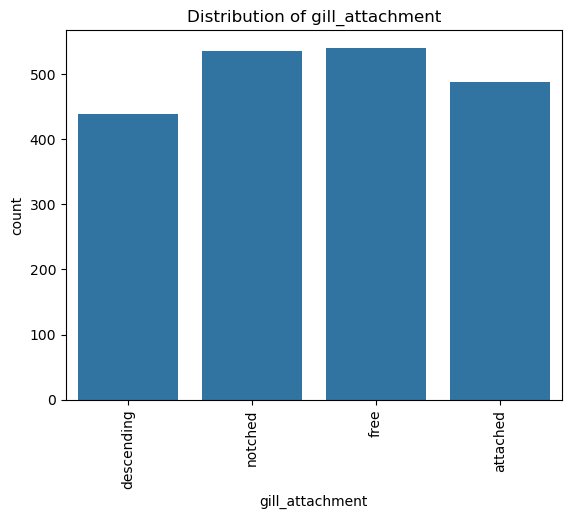

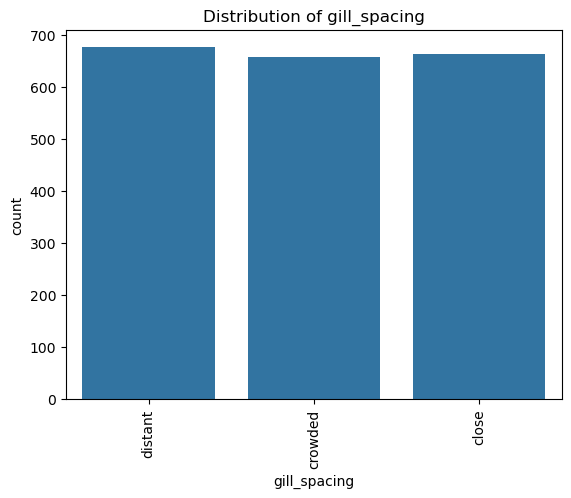

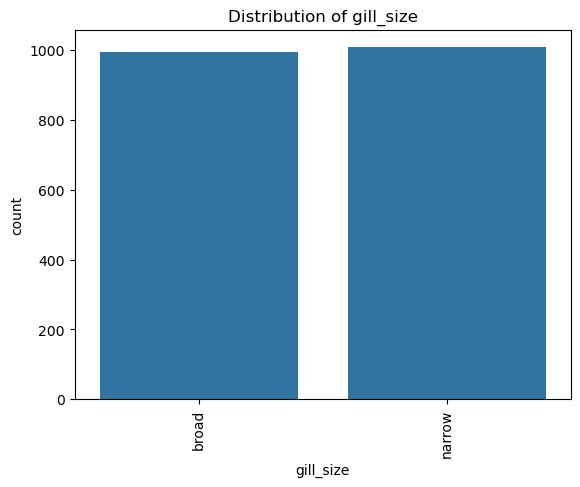

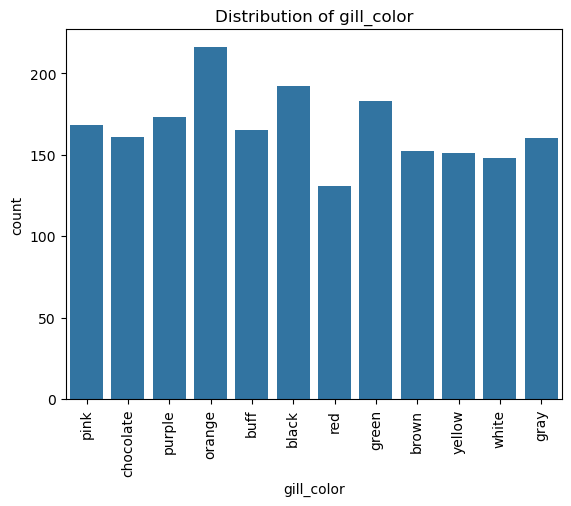

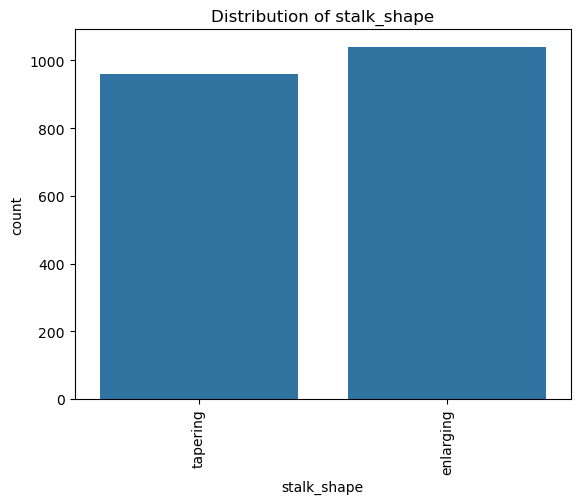

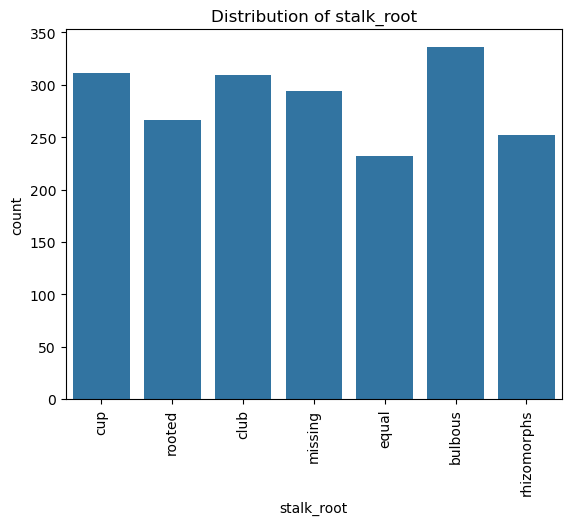

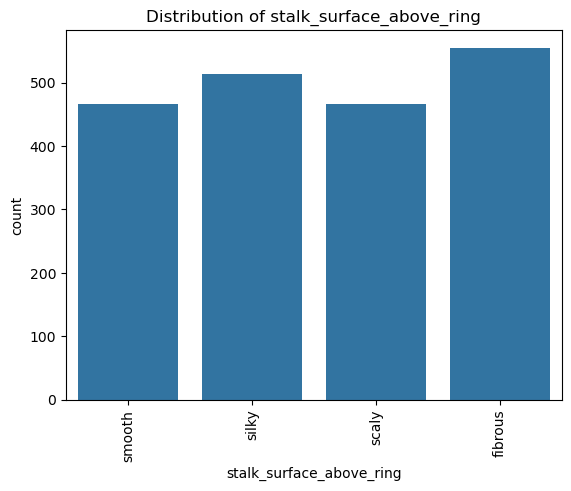

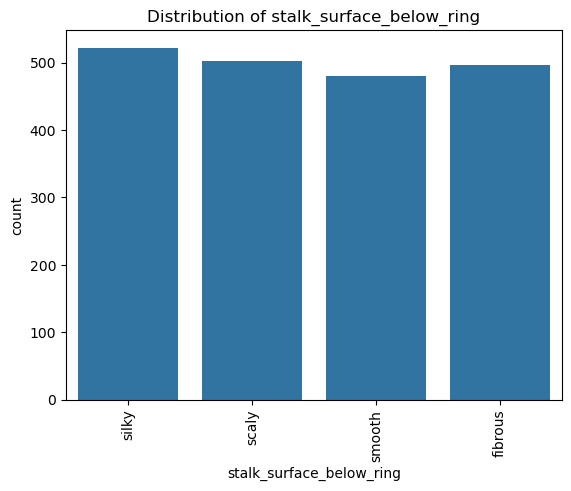

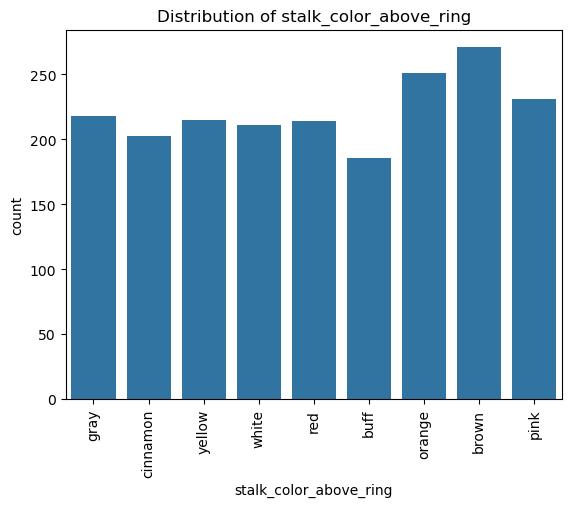

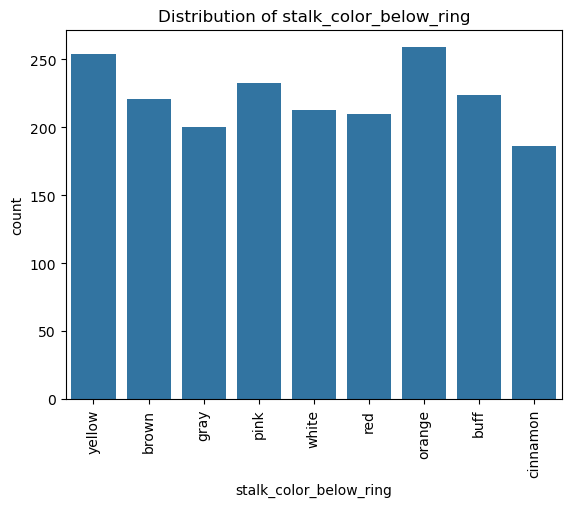

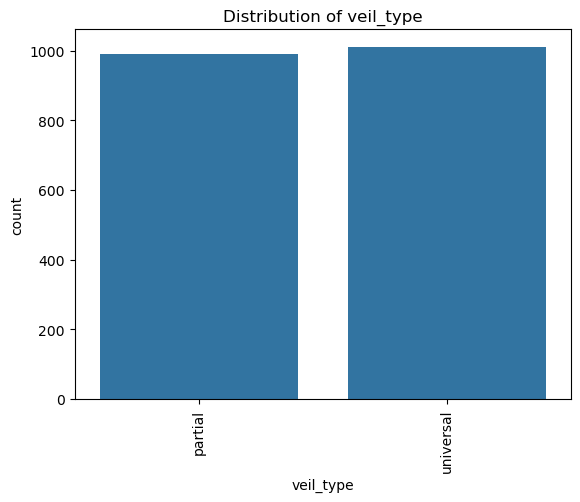

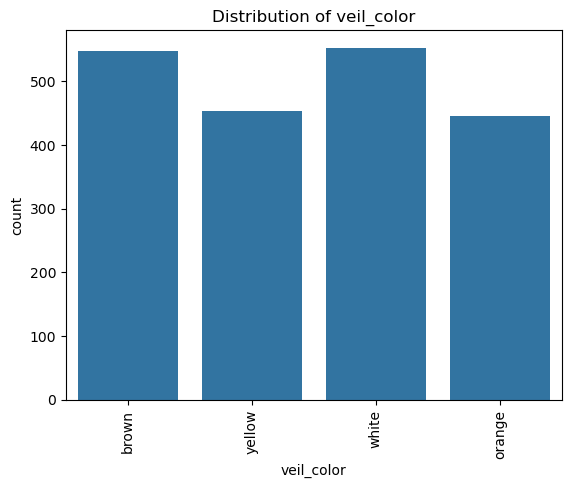

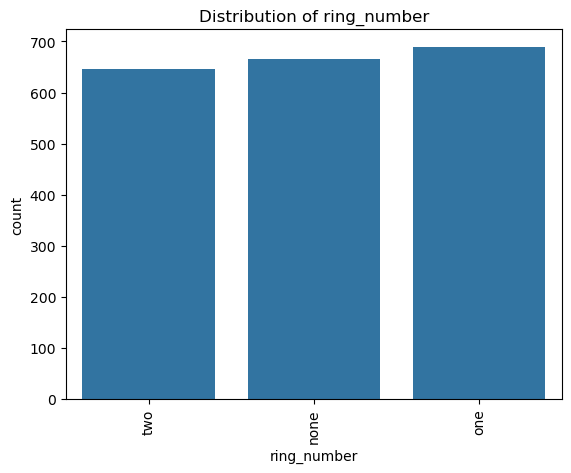

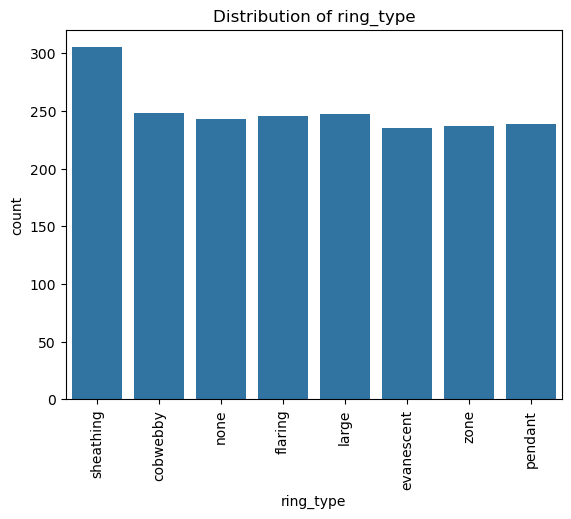

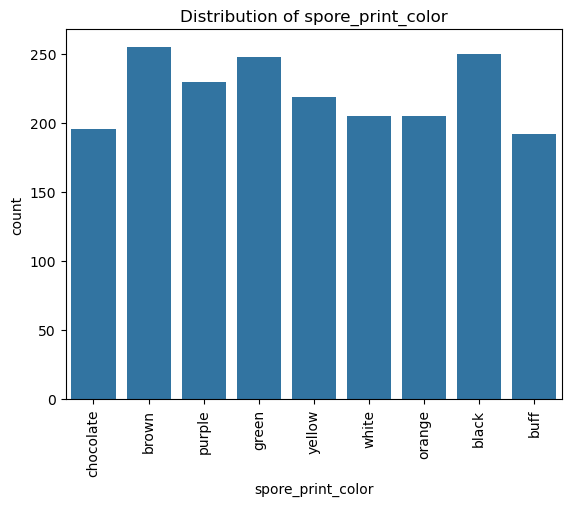

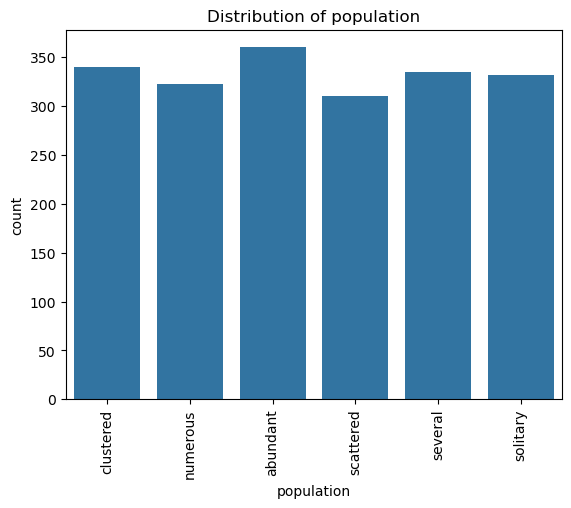

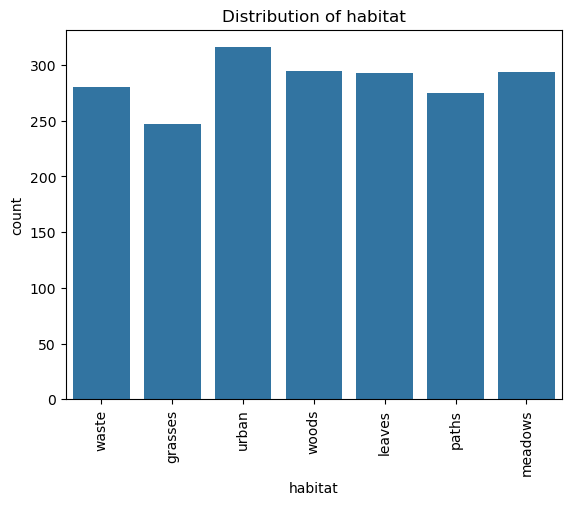

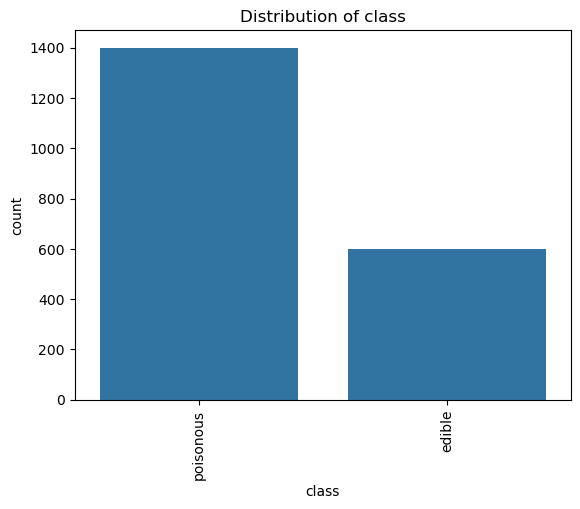

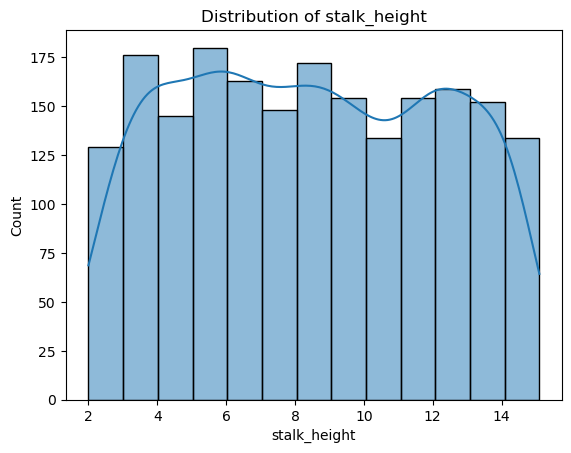

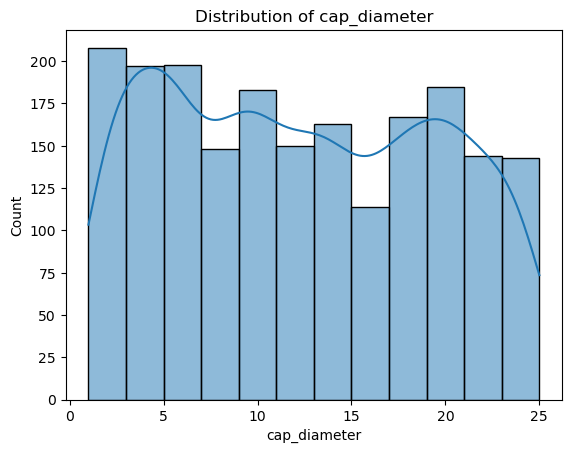

In [22]:
# Visualize feature distributions
for column in df.columns:
    if df[column].dtype == 'object':  # Categorical feature
        sns.countplot(data=df, x=column)
        plt.title(f'Distribution of {column}')
        plt.xticks(rotation=90)
        plt.show()
    else:  # Numerical feature
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.show()


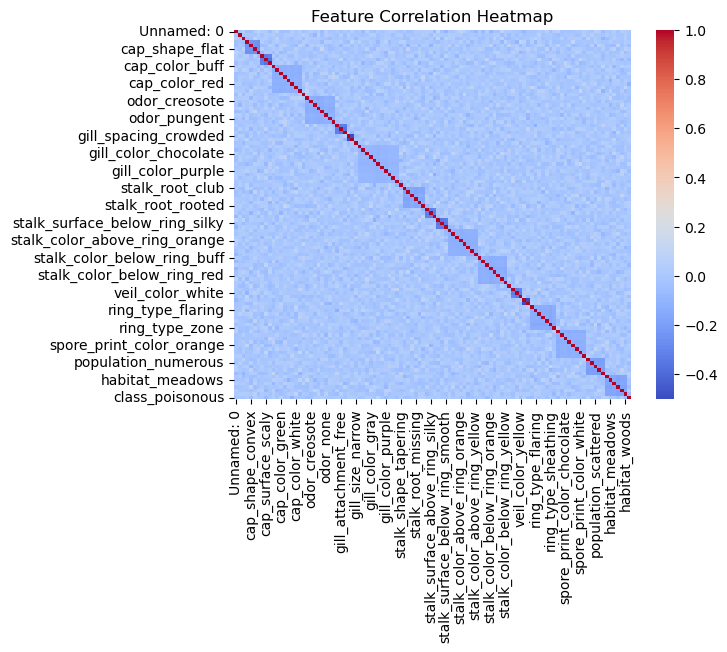

In [23]:
# Investigate feature correlations
# Encode categorical variables for correlation computation
encoded_df = pd.get_dummies(df, drop_first=True)
corr_matrix = encoded_df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# Task 2: Data Preprocessing

In [25]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded

,Unnamed: 0,stalk_height,cap_diameter,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_grooves,cap_surface_scaly,cap_surface_smooth,...,population_scattered,population_several,population_solitary,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,class_poisonous
0,1167,14.276173,5.054983,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,True,False,True
1,1037,3.952715,19.068319,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,309,9.054265,7.205884,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,True,False,True
3,282,5.226499,20.932692,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
4,820,14.037532,12.545245,False,False,True,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,5.877891,17.464145,False,False,False,True,False,True,False,...,False,False,False,True,False,False,False,False,False,True
1996,1160,6.500840,13.501957,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,True,False,True
1997,265,13.558064,11.270020,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,True
1998,411,11.092703,8.423199,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,True,True


In [26]:
# Split dataset into training and testing sets
X = df_encoded.drop('Unnamed: 0', axis=1)  # Replace 'class_e' with the target column
y = df_encoded['Unnamed: 0']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test

(      stalk_height  cap_diameter  cap_shape_conical  cap_shape_convex  \
 836       2.078784     16.765547              False              True   
 575       6.494950      6.142622              False             False   
 557       6.483619      2.766475              False             False   
 1235     14.295124     13.598769              False             False   
 1360      5.082636      6.235132              False             False   
 ...            ...           ...                ...               ...   
 1130     10.973666     13.435538              False             False   
 1294      2.570015      8.892683               True             False   
 860       3.628180      9.636546              False             False   
 1459      6.156392     22.060143              False             False   
 1126      6.389208     23.428088              False             False   
 
       cap_shape_flat  cap_shape_sunken  cap_surface_grooves  \
 836            False             False       

# Task 3: Data Visualization

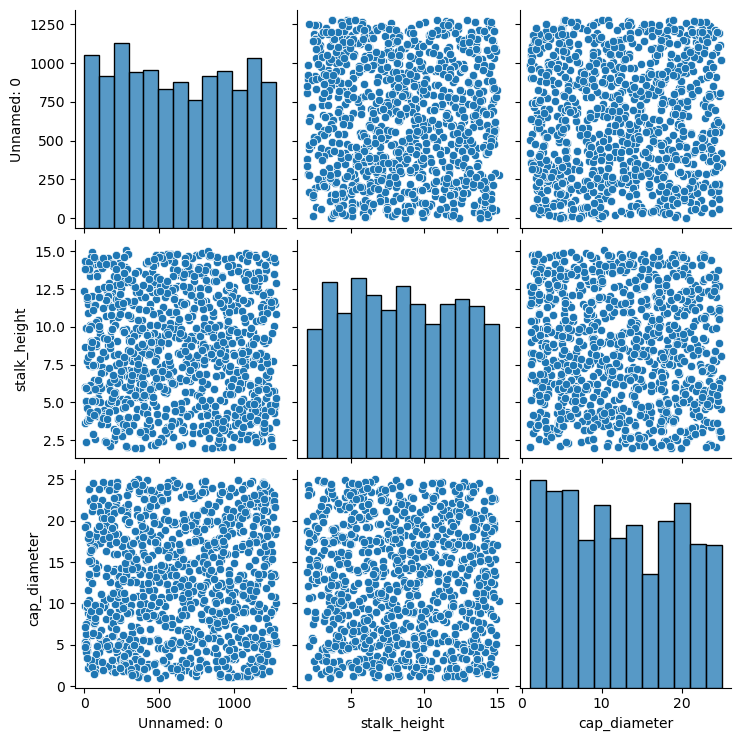

In [33]:
sns.pairplot(df)

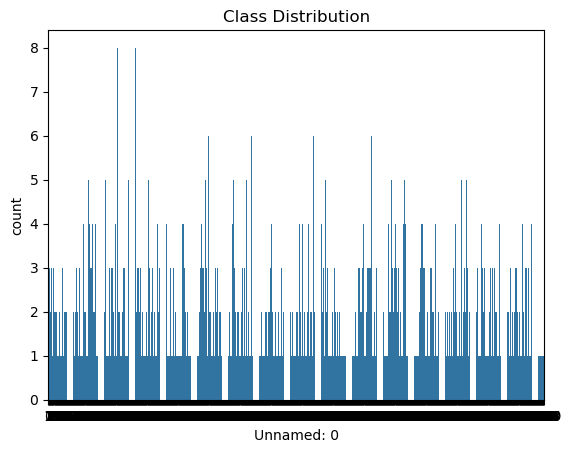

In [31]:
# Visualize class distributions
sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()

# Task 4: SVM Implementation

In [36]:
# Train SVM model
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [38]:
# Evaluate model
y_pred = svm.predict(X_test)
y_pred

array([  70, 1051, 1027,   50,   77,  880,  187,  929,  177, 1101,  377,
        280,  576,  282,  893,  106,  898, 1105,  879,  247,  151,  730,
        114, 1068,  262,  351, 1073,  850,  180, 1198, 1101,  327,  486,
        664,  456,  557,  190,  456,  330,  893,   69,  407,    8, 1145,
        167,  823, 1268,  255, 1275, 1005, 1124,  795, 1073,  270, 1272,
        319,  988,  803, 1231,  877,   29,  903,  541, 1106,  491, 1069,
        250,  433,  224, 1147, 1203,  965,  227, 1204, 1198, 1192,  958,
        668,  371,  458,  532, 1056, 1182, 1222, 1263,  887,  518, 1142,
       1250, 1020,  146, 1244, 1183,  679,   66,  539,  290,  128,  337,
        225, 1101,  115,    9,  669, 1236,  916,  433,  706,  447,  102,
        373, 1131,  115, 1071,  961,   74,  125,  433,  564, 1154,  638,
        537,  972,  730,  512,  339,  399, 1182,  226,  512,  302,   54,
        299,    0,  490, 1145,  829,  445,  327, 1199,  545,  887,  512,
       1184, 1154,  381, 1167,  708,  577,  801,  7

In [40]:
classification_report(y_test, y_pred)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\m

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         1\n           1       1.00      1.00      1.00         1\n           4       0.00      0.00      0.00         2\n           8       0.50      1.00      0.67         1\n           9       1.00      1.00      1.00         2\n          10       0.00      0.00      0.00         1\n          14       1.00      1.00      1.00         1\n          16       1.00      1.00      1.00         1\n          24       1.00      1.00      1.00         1\n          28       1.00      1.00      1.00         1\n          29       0.00      0.00      0.00         0\n          32       0.00      0.00      0.00         0\n          34       1.00      1.00      1.00         1\n          35       1.00      1.00      1.00         1\n          36       0.00      0.00      0.00         1\n          37       0.00      0.00      0.00         0\n          39       0.00      0.00      0.00         1\n       

In [42]:
confusion_matrix(y_test, y_pred)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [44]:
accuracy_score(y_test, y_pred)

0.6966666666666667

# Task 5: Visualization of SVM Results

In [47]:
# Assuming 2D projection for simplicity
# PCA can be applied for dimensionality reduction if needed
from sklearn.decomposition import PCA

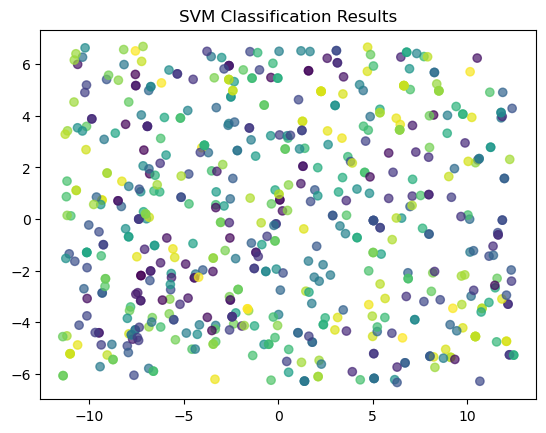

In [49]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis', alpha=0.7)
plt.title("SVM Classification Results")
plt.show()

# Task 6: Parameter Tuning and Optimization

In [52]:
# Experiment with different hyperparameters
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    print(f"Kernel: {kernel}")
    print("Accuracy Score:", accuracy_score(y_test, y_pred))

Kernel: linear
Accuracy Score: 0.6966666666666667
Kernel: poly
Accuracy Score: 0.15333333333333332
Kernel: rbf
Accuracy Score: 0.02


# Task 7: Comparison and Analysis

In [63]:
# Analyze performance for different kernels
results = []
for kernel in kernels:
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((kernel, acc))

In [64]:
acc

0.02

In [67]:
svm

SVC(random_state=42)

In [55]:
results_df = pd.DataFrame(results, columns=["Kernel", "Accuracy"])
results_df

,Kernel,Accuracy
0,linear,0.696667
1,poly,0.153333
2,rbf,0.020000


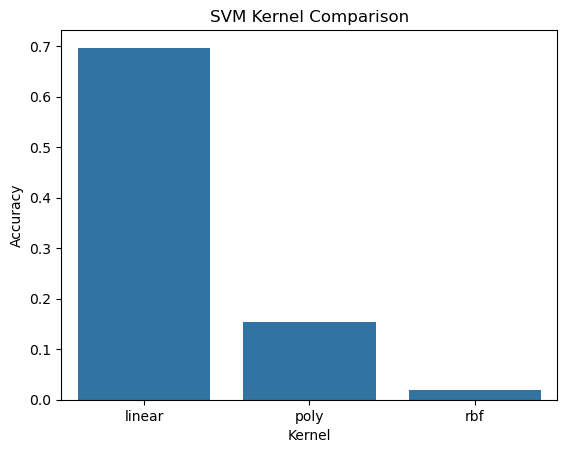

In [59]:
sns.barplot(data=results_df, x="Kernel", y="Accuracy")
plt.title("SVM Kernel Comparison")
plt.show()